# Hypothesis Testing: Examples

This notebook collects examples of the most important hypothesis tests. I have extended the course material, since **there are some errors or wrong practices in the course notebooks/videos**, as far as I understand; concretely, one should use:
- the Z-Distribution (and Z-Tests) with proportions
- the T-Distirbution (and T-Tests) with means

Recall in a hypothesis test we have:
- **Null Hypothesis**: `H0`, the parting hypothesis we want to reject (possible if `p-value < alpha`)
- **Alternative Hypothesis:** `Ha`, the hypothesis that remains after `H0` is rejected
- Significance level `alpha`: acceptance threshold of the `p-value`: p(Type I Error) = p(False Positive)
- `p-value`: **assuming `H0` is true, which is the likelihood that the data we have occurs?**
- Statistical power: `1 - beta`; `beta` = p(Type II Error) = p(False Negative)

Hypothesis tests are computed why obtaining a `p-value` of a test statistic, which has always this form:

$$Statistic = \frac{Best\ Estimate - Hypothesized\ Estimate\ (what\ comes\ after\ H0=)}{Standard\ Error\ of\ Estimate}$$ 

The definition of the **standard error** is different for each case, but its general form is the square root of the sample variance divided by the sample size. Thus, the test statistic measures **how many standard errors away is the difference between the measurements and the null hypothesis**. If the statistic is large, we are far away in the tails, thus, the likelihood for the data appearing under `H0` is low.

If `p-value < alpha`, the parameters are significantly different, i.e., we can reject the null hypothesis and accept the alternative. Otherwise (`p-value > alpha`), parameters are not significantly different, i.e., we cannot reject the null hypothesis.

Overview of sections:

1. One Population Proportion
2. Difference in Population Proportions
3. One Population Mean
4. Difference in Population Means with Independent Data
5. Difference in Population Means with Paired Data (Repeated Measured)
6. Assumptions Checks: Normality with Histograms, Boxplots, and QQ-Plots
7. Visualization of the critical T statistic
8. Power and Sample Size Relationship

In [114]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
import scipy.stats.distributions as dist
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## 1. One Population Proportion

#### Example Research Question 

In previous years 52% of parents believed that electronics and social media was the cause of their teenager’s lack of sleep. Do more parents today believe that their teenager’s lack of sleep is caused due to electronics and social media? 

- **Population**: Parents with a teenager (age 13-18)  
- **Parameter of Interest**: proportion, p
- **Null Hypothesis:** p = 0.52  
- **Alternative Hypthosis:** p > 0.52 (note that this is a one-sided test)

Data:
- Sample size: 1018 Parents.
- 56% believe that their teenager’s lack of sleep is caused due to electronics and social media.

### Computation with Libraries

In [115]:
n = 1018 # sample size
pnull = 0.52 # H0
phat = 0.56 # Ha
# Proportion hypotheses are tested with the Z=N(0,1) distribution
# The parameters for the Z-Test are self-explanatory
# The Z value and its p-value are returned
# Note that depending on the alternative >, <, !=
# a different token is used
# hence, the p-vale is computed as one- or two-sided!
sm.stats.proportions_ztest(phat * n,
                           n,
                           pnull,
                           alternative='larger',
                           prop_var=pnull)

(2.5545334262132955, 0.005316510991822442)

### Manual Computation

In [116]:
n = 1018 # sample size
pnull = 0.52 # H0
phat = 0.56 # Ha
# The Standard Error of the estimate is measured with the p0 proportion!
# The reason is that we don't really know p, we have the best estimate of it
se = np.sqrt(pnull*(1-pnull)/n)
test_stat = (phat - pnull) / se
print("Z-Statistic = ", test_stat)

Z-Statistic =  2.5545334262132955


In [117]:
# One-sided: Ha >
pvalue = dist.norm.cdf(-np.abs(test_stat))
# Equivalent to
# pvalue = 1-dist.norm.cdf(np.abs(test_stat))
print("p-value = ", pvalue)

p-value =  0.005316510991822442


## 2. Difference in Population Proportions

#### Example Research Question

Is there a significant difference between the population proportions of parents of black children and parents of Hispanic children who report that their child has had some swimming lessons?

- **Populations**: All parents of black children age 6-18 and all parents of Hispanic children age 6-18  
- **Parameter of Interest**: Proportion difference: p1 - p2, where p1 = black and p2 = hispanic  
- **Null Hypothesis:** p1 - p2 = 0
- **Alternative Hypthosis:** p1 - p2 $\neq$ 0  

Data:
- 91 out of 247 (36.8%) sampled parents of black children report that their child has had some swimming lessons.
- 120 out of 308 (38.9%) sampled parents of Hispanic children report that their child has had some swimming lessons.

### Manual Computation

In [118]:
# Sample sizes
n1 = 247
n2 = 308

# Number of parents reporting that their child had some swimming lessons
y1 = 91
y2 = 120

# Estimates of the population proportions
p1 = round(y1 / n1, 2)
p2 = round(y2 / n2, 2)

# Estimate of the combined population proportion
phat = (y1 + y2) / (n1 + n2)

# Estimate of the variance of the combined population proportion
va = phat * (1 - phat)

# Estimate of the standard error of the combined population proportion
se = np.sqrt(va * (1 / n1 + 1 / n2))

# Test statistic and its p-value: 2-sided, because the Ha is !=
test_stat = (p1 - p2) / se
pvalue = 2*dist.norm.cdf(-np.abs(test_stat))
# Equivalent to
# pvalue = 2*(1-dist.norm.cdf(np.abs(test_stat)))

# Print the test statistic its p-value
print("Test Statistic")
print(round(test_stat, 2))

print("\nP-Value")
print(round(pvalue, 2))

Test Statistic
-0.48

P-Value
0.63


### Computation with Libraries: Incorrect, because a Z-Test Should Be Used?

In [119]:
# Similar Test using Statsmodels Done in the Notebook Video
# But this is using the T-Distribution??
# I think this is wrong - we should use the Z-Distribution with proportions...??

# We create population values, which follow the binomial distribution
population1 = np.random.binomial(1, p1, n1) # 0, 0, 0, 1, 0, ...
population2 = np.random.binomial(1, p2, n2)

print("\nT-Test with Statsmodels (Not Z-Test)")
print(sm.stats.ttest_ind(population1, population2))


T-Test with Statsmodels (Not Z-Test)
(-0.3923613549040447, 0.6949424130119519, 553.0)


## 3. One Population Mean

#### Example Research Question 

Is the average cartwheel distance (in inches) for adults 
more than 80 inches?

- **Population**: All adults  
- **Parameter of Interest**: $\mu$, population mean cartwheel distance.
- **Null Hypothesis:** $\mu$ = 80
- **Alternative Hypthosis:** $\mu$ > 80

Data:
- 25 Adults
- $\mu = 82.46$
- $\sigma = 15.06$

In [120]:
df = pd.read_csv("Cartwheeldata.csv")
df.head()

,ID,Age,Gender,GenderGroup,Glasses,GlassesGroup,Height,Wingspan,CWDistance,Complete,CompleteGroup,Score
0,1,56,F,1,Y,1,62.0,61.0,79,Y,1,7
1,2,26,F,1,Y,1,62.0,60.0,70,Y,1,8
2,3,33,F,1,Y,1,66.0,64.0,85,Y,1,7
3,4,39,F,1,N,0,64.0,63.0,87,Y,1,10
4,5,27,M,2,N,0,73.0,75.0,72,N,0,4


In [121]:
n = len(df)
mean = df["CWDistance"].mean()
sd = df["CWDistance"].std()
(n, mean, sd)

(25, 82.48, 15.058552387264855)

### Computation with Libraries: Incorrect, because We Should Use the T-Distirbution?

In [122]:
# The Z value and the associated p-value are obtained
# However, we should be using the T-Distribution?? -> T-Test
sm.stats.ztest(df["CWDistance"],
               value = 80,
               alternative = "larger")

(0.8234523266982029, 0.20512540845395266)

### Manual Computation

In [123]:
# Manual Computation of the T-Test

# T statistic
se = sd/np.sqrt(n)
t = (mean - 80)/se

print("T-Statistic = ", t)

T-Statistic =  0.8234523266982027


In [124]:
# With T and df, we can get the p-value from the T distribution
df = n - 1
# p-value is obtained form the cummulative density function (CDF) with the given df
# since we want the remaining are under the PDF, we need to compute 1-CDF(t)
p = 1 - dist.t.cdf(np.abs(t),df=df)
# If that were a 2-sided test (Ha !=), we would have to x2 the p-value
# Display
print("t = " + str(t))
print("p-value = " + str(p))

t = 0.8234523266982027
p-value = 0.2091793328533854


## 4. Difference in Population Means with Independent Data

#### Research Question 

Considering adults in the NHANES data, do males have a significantly higher mean Body Mass Index than females?

- **Population**: Adults in the NHANES data.  
- **Parameter of Interest**: $\mu_1 - \mu_2$, Body Mass Index.  
- **Null Hypothesis:** $\mu_1 = \mu_2$  
- **Alternative Hypthosis:** $\mu_1 \neq \mu_2$

Data: 
- 2976 Females; $\mu_1 = 29.94$; $\sigma_1 = 7.75$  
- 2759 Male Adults; $\mu_2 = 28.78$; $\sigma_2 = 6.25$  
- $\mu_1 - \mu_2 = 1.16$

In [125]:
url = "nhanes_2015_2016.csv"
da = pd.read_csv(url)
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [126]:
females = da[da["RIAGENDR"] == 2]
male = da[da["RIAGENDR"] == 1]

In [127]:
n1 = len(females)
mu1 = females["BMXBMI"].mean()
sd1 = females["BMXBMI"].std()

(n1, mu1, sd1)

(2976, 29.939945652173996, 7.75331880954568)

In [128]:
n2 = len(male)
mu2 = male["BMXBMI"].mean()
sd2 = male["BMXBMI"].std()

(n2, mu2, sd2)

(2759, 28.778072111846985, 6.252567616801485)

### Computation with Libraries: We Should Use the T-Distribution!

In [129]:
# Z-Test (originally shown in the notebook)
sm.stats.ztest(females["BMXBMI"].dropna(), male["BMXBMI"].dropna())

(6.1755933531383205, 6.591544431126401e-10)

In [130]:
# T-Test (what should be used according to the course)
sm.stats.ttest_ind(females["BMXBMI"].dropna(), male["BMXBMI"].dropna())

(6.175593353138303, 7.050275578095374e-10, 5660.0)

### Manual Computation

We can use the pooled and unpooled appreaches to compute the standard error manually.

**Pooled** approach (variance of each group assumed to be the same ~ similar):

$$SE = \sqrt{\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}}$$

being $s_i$, $n_i$ the standard deviation and the sample size of group $i$.

**Unpooled** approach (variance of each group is different):

$$SE = \sqrt{\frac{(n_1-1)s_1^2 + (n_2-1)s_2^2}{n_1+n_2-2}} \sqrt{\frac{1}{n_1}+\frac{1}{n_2}}$$


In [131]:
se_pooled = np.sqrt(((sd1**2)/n1) + ((sd2**2)/n2))
se_unpooled = np.sqrt(((n1-1)*sd1**2 + (n2-1)*sd2**2)/(n1+n2-2)) * np.sqrt((1/n1) + (1/n2))

In [132]:
#t = (mu1 - mu2)/se_pooled
t = (mu1 - mu2)/se_unpooled
print("T-Statistic = ", t)

T-Statistic =  6.217136917798761


In [133]:
# With T and df, we can get the p-value from the T distribution
df = n1 + n2 - 2
# p-value is obtained form the cummulative density function (CDF) with the given df
# since we want the remaining are under the PDF, we need to compute 1-CDF(t)
# Since it is a 2-sided test (Ha !=), we need to x2 the p-value
p = 2*(1 - dist.t.cdf(np.abs(t),df=df))
# Display
print("t = " + str(t))
print("p-value = " + str(p))

t = 6.217136917798761
p-value = 5.420337512163087e-10


## 5. Difference in Population Means with Paired Data (Repeated Measures)

There was no example provided in the notebook, thus I created the example from the lecture examples.

#### Research Question

Home renovations offers from Supplier 1 & 2 are collected for 20 clients. Is the mean cost offered by each supplier different?

- **Population**: Offer costs of Suppliers 1 & 2
- **Parameter of Interest**: $\mu(C_1 - C_2)$, Mean Cost Difference
- **Null Hypothesis:** $\mu(C_1 - C_2) = 0$  
- **Alternative Hypthosis:** $\mu(C_1 - C_2) \neq 0$  

Data: 
- $n = 20$
- Cost difference mean: $\mu(C_1 - C_2) = 17.30$
- Standard ddeviation of cost difference: $\sigma(C_1 - C_2) = 28.49$

Note that **a paired t-test for means is equivalent to taking the difference between the first and second measurement, and using a one-sample test to compare the mean of these differences to zero.**

### Manual Computation

In [134]:
mu = 17.30
sd = 28.49
n = 20
se = sd / np.sqrt(n)
t = (mu - 0) / se
print("T-Statistic = ", t)

T-Statistic =  2.7156178315722266


In [135]:
# With T and df, we can get the p-value from the T distribution
df = n - 1
# p-value is obtained form the cummulative density function (CDF) with the given df
# since we want the remaining are under the PDF, we need to compute 1-CDF(t)
# Since it is a 2-sided test (Ha !=), we need to x2 the p-value
p = 2*(1 - dist.t.cdf(np.abs(t),df=df))
# Display
print("t = " + str(t))
print("p-value = " + str(p))

t = 2.7156178315722266
p-value = 0.013718818836080393


## 6. Assumptions Checks: Normality with Histograms, Boxplots, and QQ-Plots

The following assumptions are done to apply the parametric tests with the Z and T distirbution statistics:
- Measurements done in a randomly chosen sample.
- If the measurements belong to independent samples, they need to be independent; similarly, if the test assumes the data is paired (i.e., dependent), it needs to be paired
 Measured means need to be bell-shaped, tending to be normal. This assumption can be skipped if the sample size is large enough. Be can test the normality visually with the histogram, box-plots or QQ-Plots. If the assumption is not true, we need to use non-parametric tests (e.g., Wilcoxon for paired means).

In [136]:
da = pd.read_csv("nhanes_2015_2016.csv")

In [137]:
females = da[da["RIAGENDR"] == 2]
males = da[da["RIAGENDR"] == 1]

<AxesSubplot:xlabel='BMXBMI', ylabel='Count'>

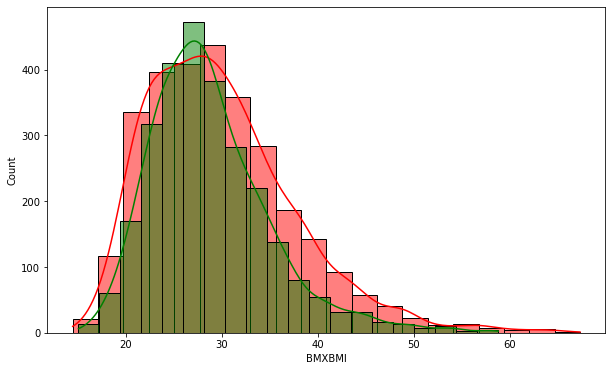

In [138]:
plt.figure(figsize=(10,6))
sns.histplot(data=females["BMXBMI"],color='red',kde=True,bins=20)
sns.histplot(data=males["BMXBMI"],color='green',kde=True,bins=20)

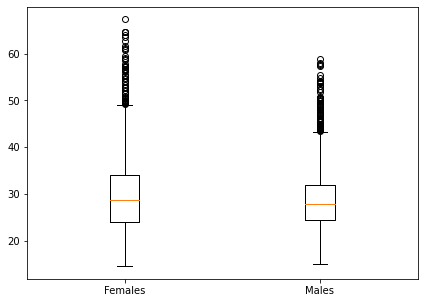

In [139]:
plt.figure(figsize=(7,5))
plt.boxplot((females["BMXBMI"].dropna(),males["BMXBMI"].dropna()),labels=['Females','Males'])
plt.show()

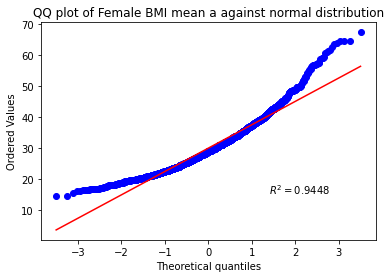

In [140]:
stats.probplot(females["BMXBMI"].dropna(), dist="norm", fit= True, plot=plt, rvalue=True)
plt.title('QQ plot of Female BMI mean a against normal distribution')
plt.show()

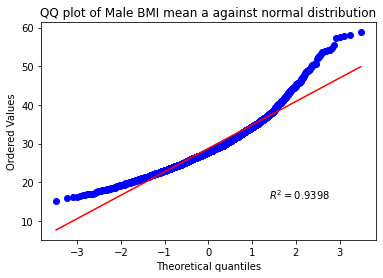

In [141]:
stats.probplot(males["BMXBMI"].dropna(), dist="norm", fit= True, plot=plt, rvalue=True)
plt.title('QQ plot of Male BMI mean a against normal distribution')
plt.show()

## 7. Visualization of the critical T statistic

The critital T Statistic is the one that gives the `p-value` equal to the level of siginificance `alpha`.

In [142]:
from scipy.stats import t, norm
import matplotlib.pyplot as plt
%matplotlib inline

In [143]:
def plot_t_critical(df,alpha=0.05):
    # Set figure 
    plt.figure(figsize=(8, 4))
    # T distribution with df
    dist = t(df)
    # t range (x)
    x = np.linspace(dist.ppf(0.0001), dist.ppf(0.9999), 100)
    # Critical value; PPF is the inverse of CDF
    t_crit = dist.ppf(1-alpha)
    # Plot values
    plt.plot(x, dist.pdf(x), alpha=0.6, label=' X ~ T({})'.format(df))
    plt.vlines(t_crit, 0.0, 1.0, color='red', linestyles="dashdot", label="Crit. Value: {:.2f}\nalpha: {:.2f}".format(t_crit,alpha))
    plt.legend()
    plt.title('T-Distribution df:{}'.format(df))
    plt.xlabel('X=t')

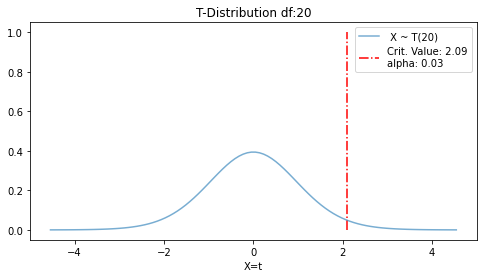

In [144]:
# We select the df of the T distribution, as well as our alpha
# If we have a 2-sided test (Ha !=), we need to divide alpha by 2
plot_t_critical(df=20,alpha=0.05/2)

## 7. Power and Sample Size Relationship

The following four variables are related:
- Effect size: Cohen's `d` between groups
- Sample size (`n`)
- Significance level (`alpha`)
- Statistical power (`1-beta`)

Thus, fixing 3 of them, the fourth can be obtained. That is called power analysis, and it often is used to:

1. Estimate the sample size required for a given power
2. Estimate the power our setup and test has (i.e., probability of false negatives)

Note that Cohen's `d` is one possible measurement of the effect size; it is defined as

$$d = \frac{\overline{x_1}-\overline{x_2}}{s},\,\, s = \sqrt{\frac{(n_1-1)s_1^2 + (n_2-1)s_2^2}{n_1+n_2-2}}$$

### Estimate Sample Size Required

In [146]:
# Estimate sample size via power analysis
from statsmodels.stats.power import TTestIndPower
# parameters for power analysis
effect = 0.8 # Cohen's d
alpha = 0.05
power = 0.8 # 1 - beta
# perform power analysis
analysis = TTestIndPower()
result = analysis.solve_power(effect, power=power, nobs1=None, ratio=1.0, alpha=alpha)
print('Sample Size: %.3f' % result)

Sample Size: 25.525


### Visualization of the Effect of the Sample Size

In general, the larger the sample size, the larger the power, hence less false negatives. In the following example, the `p-values` of different samples sizes are measured. For each sample size, 500 samples are drawn and computed. The number of `p < alpha` increases with the sample size: the probability of correctly rejecting `H0` is higher, thus having less false negatives.

In [165]:
da = pd.read_csv("nhanes_2015_2016.csv")
dx = da[["BPXSY1", "BPXSY2", "RIDAGEYR"]].dropna()

In [166]:
all_p = []
dy = dx.loc[(dx.RIDAGEYR >= 50) & (dx.RIDAGEYR <= 60), :]
for n in 100, 200, 400, 800:
    pv = []
    for i in range(500):
        dz = dy.sample(n)
        db = dz.BPXSY1 - dz.BPXSY2
        _, p = sm.stats.ztest(db.values, value=0)
        pv.append(p)
    pv = np.asarray(pv)
    all_p.append(pv)
    print((pv <= 0.05).mean())

0.22
0.366
0.694
1.0


<AxesSubplot:ylabel='Count'>

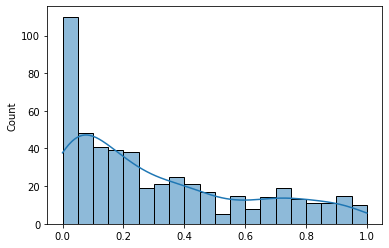

In [167]:
# 0: n = 100
sns.histplot(all_p[0],kde=True,bins=20)

<AxesSubplot:ylabel='Count'>

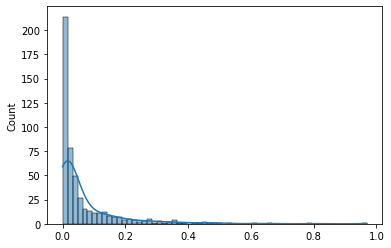

In [168]:
# 2: n = 400
sns.histplot(all_p[2],kde=True)